## Flight Price Prediction

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#uploading the dataset
train_dataset = pd.read_excel("Data_Train.xlsx")
pd.set_option("display.max_columns",None)
#displaying the top 5 records of dataset
train_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
#info of dataset
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [3]:
train_dataset.shape

(10683, 11)

In [4]:
train_dataset.dropna(inplace=True)
train_dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Exploratory Data Analysis

In [5]:
train_dataset["Journey_day"] =pd.to_datetime(train_dataset["Date_of_Journey"],format="%d/%m/%Y").dt.day
train_dataset["Journey_month"] =pd.to_datetime(train_dataset["Date_of_Journey"],format="%d/%m/%Y").dt.month
train_dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)
train_dataset.sample(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
6610,Air India,Mumbai,Hyderabad,BOM → BHO → DEL → HYD,06:00,09:10 07 Mar,27h 10m,2 stops,No info,13169,6,3
4092,SpiceJet,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 13 May,1h 30m,non-stop,No info,2017,12,5
6430,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,18:55,23:35 19 May,28h 40m,1 stop,In-flight meal not included,10844,18,5
4631,IndiGo,Delhi,Cochin,DEL → BOM → COK,16:00,01:35 10 Mar,9h 35m,1 stop,No info,13611,9,3
1243,Air India,Delhi,Cochin,DEL → BLR → COK,17:40,23:00,5h 20m,1 stop,No info,8067,21,5


In [6]:
#extracting the hour and minutes from departure and arrival time
train_dataset["Dep_hour"] = pd.to_datetime(train_dataset["Dep_Time"]).dt.hour
train_dataset["Dep_min"] = pd.to_datetime(train_dataset["Dep_Time"]).dt.minute
train_dataset.drop(["Dep_Time"], axis = 1, inplace = True)

train_dataset["Arrival_hour"] = pd.to_datetime(train_dataset["Arrival_Time"]).dt.hour
train_dataset["Arrival_min"] = pd.to_datetime(train_dataset["Arrival_Time"]).dt.minute
train_dataset.drop(["Arrival_Time"], axis = 1, inplace = True)

In [7]:
# Assigning and converting duration into list
duration = list(train_dataset["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_in_hours = []
duration_in_mins = []
for i in range(len(duration)):
    duration_in_hours.append(int(duration[i].split(sep = "h")[0]))  
    duration_in_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [8]:
# To train_dataset dataframe adding duration_hours and duration_mins list 
train_dataset["Duration_hours"] = duration_in_hours
train_dataset["Duration_mins"] =duration_in_mins
train_dataset.drop(["Duration"], axis =1, inplace=True)
train_dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data


In [9]:
train_dataset["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [10]:
# AOneHotEncoder performed on airline
Airline = train_dataset[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first =True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [11]:
# OneHotEncoding for destination variable to handle categorical data
Destination =train_dataset[["Destination"]]
Destination =pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [12]:
Source =train_dataset[["Source"]]
Source =pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [13]:
train_dataset.drop(["Route","Additional_Info"],axis=1, inplace=True)

#Performing LabelEncoder

train_dataset.replace({"non-stop":0, "1 stop": 1, "2 stops": 2, "3 stops":3, "4 stops": 4}, inplace=True)
# train_dataset, Airline, Source,  and Destination are con
data_train =pd.concat([train_dataset,Airline,Source,Destination], axis=1)
data_train.drop(["Airline","Source", "Destination"], axis=1, inplace=True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Feature Selection


In [14]:
data_train.shape

(10682, 30)

In [15]:
X = data_train.loc[:, ['Total_Stops','Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

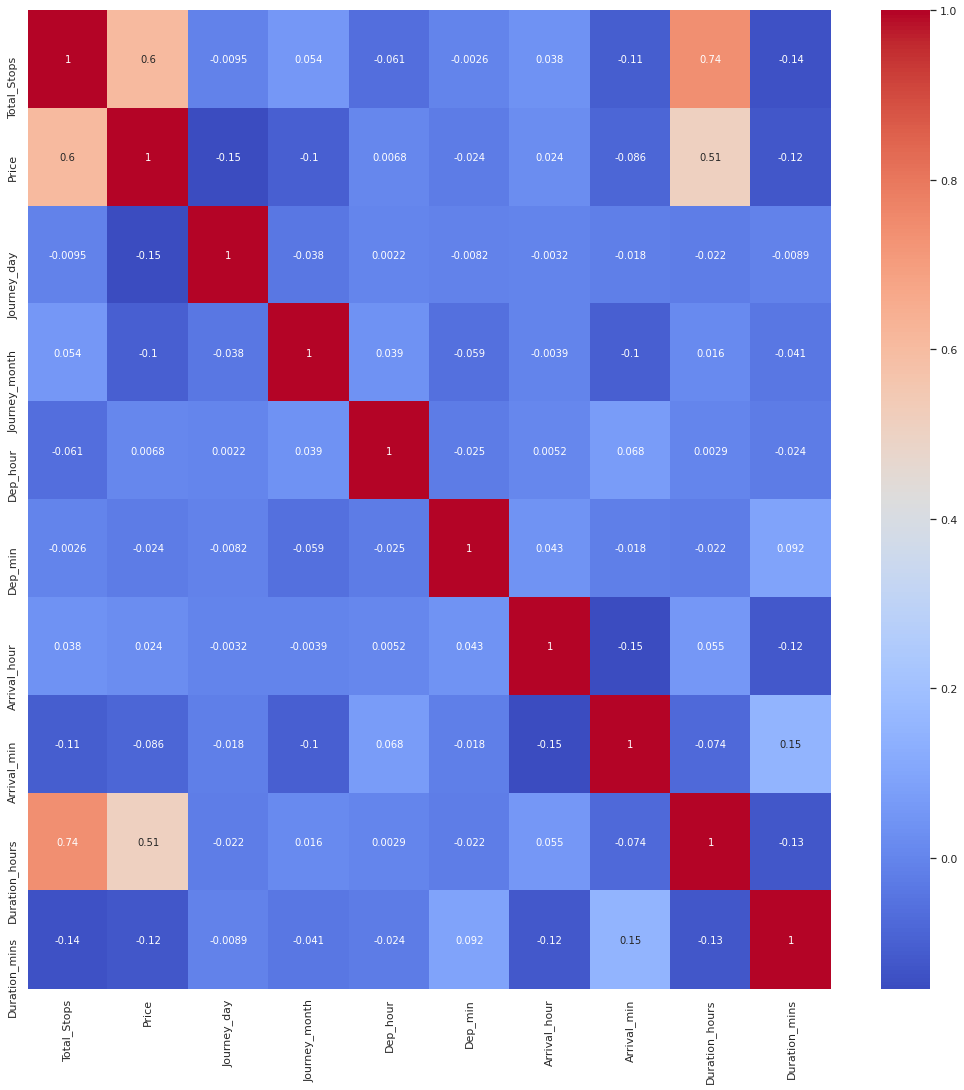

In [17]:
#Find correlation between Independent(X) and dependent attributes(y)

plt.figure(figsize = (18,18))

sns.heatmap(train_dataset.corr(),annot= True, cmap = "coolwarm")

plt.show()

In [18]:
# Important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection =ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [19]:
#ExtraTreesRegressor is used to choose the importan feature for the prediction
print(selection.feature_importances_)

[2.36672516e-01 1.44061307e-01 5.28897022e-02 2.39800403e-02
 2.11170962e-02 2.77234815e-02 1.97108441e-02 1.12252758e-01
 1.81531917e-02 1.09822224e-02 1.62631807e-03 2.05743679e-02
 1.36803224e-01 6.67293243e-02 1.75751865e-02 8.52567543e-04
 3.10902308e-03 1.16802611e-04 5.20796467e-03 9.01077554e-05
 4.75203796e-04 1.02081302e-02 3.59819633e-03 7.18215964e-03
 1.10455821e-02 1.55599317e-02 6.27490655e-03 4.85262712e-04
 2.49425808e-02]


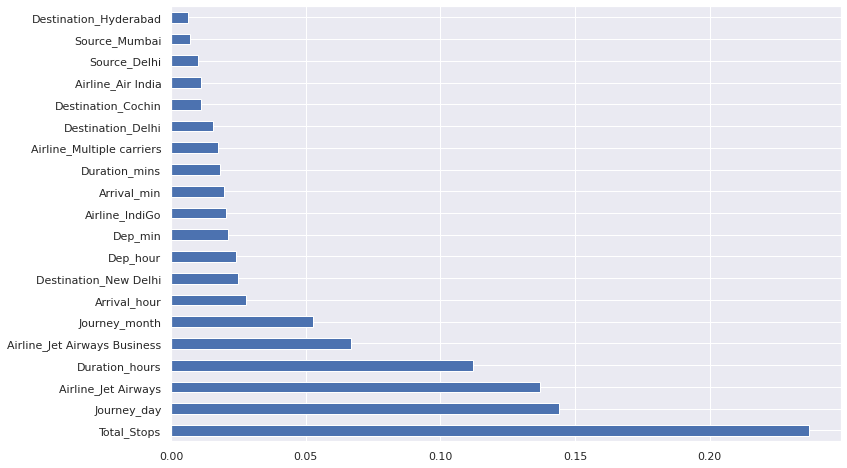

In [20]:
# plot graph of important feature for better visualization

plt.figure(figsize =(12,8))
feat_importances =pd.Series(selection.feature_importances_,index =X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

## Random Forest Algorithm for model building



In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X,y,test_size = 0.2, random_state = 42)

In [22]:
from sklearn.ensemble import RandomForestRegressor
random_fo_reg = RandomForestRegressor()
random_fo_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
y_pred =random_fo_reg.predict(X_test)

In [24]:
random_fo_reg.score(X_train,y_train)

0.9538137713771146

In [25]:
random_fo_reg.score(X_test,y_test)

0.798798947411758

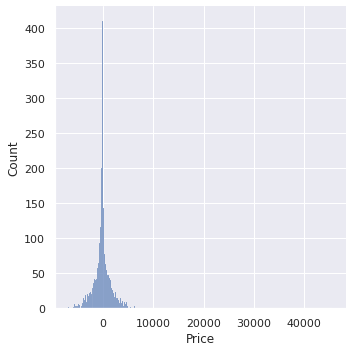

In [26]:
sns.displot(y_test-y_pred)
plt.show()

In [27]:
from sklearn import metrics


## Performing Hyperparameter Tuning



In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
#Hyperparameter tuning by Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [30]:
# creating the random grid

random_fo_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [31]:
# K-Fold validation is used for random search with 100 combinations (K=5)
random_forest_model = RandomizedSearchCV(estimator = random_fo_reg, param_distributions = random_fo_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [32]:
random_forest_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [33]:
prediction = random_forest_model.predict(X_test)

<Figure size 576x576 with 0 Axes>

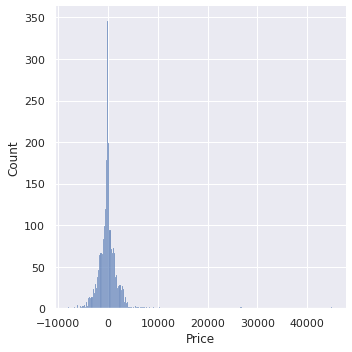

In [34]:
#Plot after performing the hyperparameter tuning
plt.figure(figsize =(8,8))
sns.displot(y_test-prediction)
plt.show()

In [35]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_forest_model, file)
